## Calculating the Return of a Portfolio of Securities

Download data for a portfolio composed of 5 stocks. Do it for British Petroleum, Ford, Exxon, Lincoln, and Apple for the period ‘2000-1-1’ until today.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as wb

In [8]:
# british petroleum: BP PLC, ford: F, exxon: XOM, lincoln: LNC, apple: AAPL
tickers = ['BP', 'F', 'XOM', 'LNC', 'AAPL']

# criando dataframe
data = pd.DataFrame()

# salvando os dados
for t in tickers:
    data[t] = wb.DataReader(t, data_source='yahoo', start='2000-1-1')['Adj Close']

### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

Normalize to a hundred and plot the data on a graph (you can apply the .loc() or the .iloc() method). 

In [9]:
# Normalizando os dados
normalizados = (data / data.iloc[0]) * 100

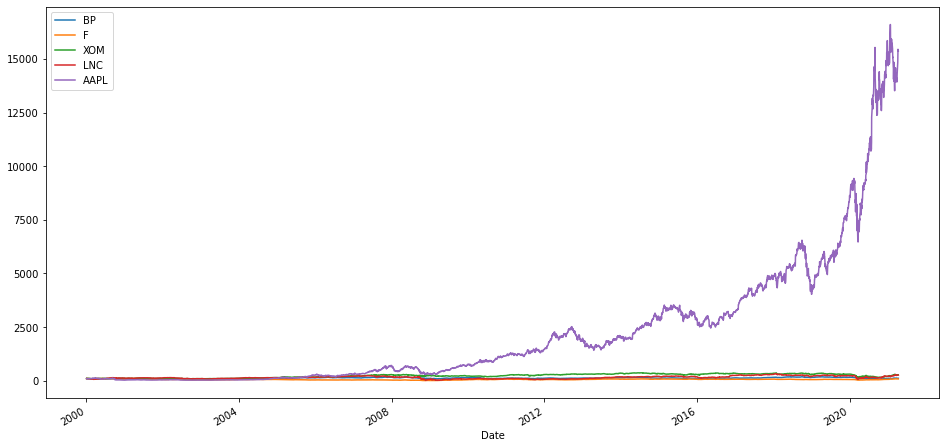

In [12]:
# Plotando os dados normalizados
normalizados.plot(figsize=(16,8))
plt.show();

How would you interpret the behavior of the stocks? Just by looking at the chart, would you be able to create a portfolio that provides a solid return on investment?

**Actually, I wouldn't do anything, becaute I don't have numbers about return.**

*****

### Calculating the Return of a Portfolio of Securities

Obtain the simple return of the securities in the portfolio and store the results in a new table.

In [18]:
# Retorno individual dos ativos
retorno = (normalizados / normalizados.shift(1)) - 1

# retorno
retorno

,BP,F,XOM,LNC,AAPL
Date,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.005314,-0.033413,-0.019154,-0.028801,-0.084310
2000-01-05,0.034189,0.003703,0.054516,-0.034596,0.014633
2000-01-06,0.002066,0.001230,0.051698,0.018302,-0.086538
2000-01-07,-0.018557,0.073710,-0.002935,0.025338,0.047369
...,...,...,...,...,...
2021-04-06,0.034625,0.017323,-0.002832,0.006555,0.002462
2021-04-07,0.010757,-0.014706,0.004437,0.013024,0.013390
2021-04-08,-0.025621,-0.017282,-0.010426,-0.012700,0.019234


First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.

In [19]:
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

Obtain the annual returns of each of the stocks and then calculate the dot product of these returns and the weights.

In [20]:
retorno_percentual = retorno.mean() * 250

# Calculando o peso
np.dot(retorno_percentual, weights)

0.1444436872507459

Transform the result into a percentage form. 

In [22]:
percent = round(np.dot(retorno_percentual, weights), 5) * 100

percent

14.444

Is the return of this portfolio satisfactory?

**No, it's low.**